#### Job Satisfaction

Let's not have a look if people are usually sattisfied with a their data science jobs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('C:/Users/Cristian/AppData/Local/Programs/Python/Data science learning/Udacity/survey_results_public.csv')
schema = pd.read_csv('C:/Users/Cristian/AppData/Local/Programs/Python/Data science learning/Udacity/survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's see first of all the proportion of missing values in the **JobSatisfaction** column and also the min and max values to get an idea of the variability of our data.

In [2]:
df['JobSatisfaction'].isnull().mean()

0.20149722542142184

Seems like there is a quite a bit of data there with about 80% of the rows beign filled.

To get a better feel for the data lower down let's have a look at a histogram to understand the distribution.

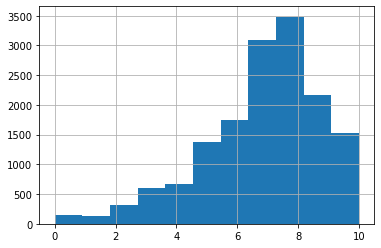

In [6]:
df['JobSatisfaction'].hist(bins = 11);

The above suggest that most of the data is in the upper half. For the stuff we will be looking at below this means that small changes might be bigger than they seem because not all the 0-10 range is useful.

Also from the histogram, we can see that the data is normally distributed, meaning we can use another cool function to have a quick look at some stats.

In [7]:
df['JobSatisfaction'].describe()

count    15253.000000
mean         7.000721
std          2.128648
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: JobSatisfaction, dtype: float64

The one thing to keep in mind is the value of the standard distribution, 2.13.

Now that we are done geeking out, let's have a quick look if type of employment has an impact on job satisfaction

In [8]:
df.groupby(['EmploymentStatus']).mean()['JobSatisfaction']

EmploymentStatus
Employed full-time                                      6.980608
Employed part-time                                      6.846154
I prefer not to say                                          NaN
Independent contractor, freelancer, or self-employed    7.231985
Not employed, and not looking for work                       NaN
Not employed, but looking for work                           NaN
Retired                                                      NaN
Name: JobSatisfaction, dtype: float64

Freelancers seem to have 0.25 better satisfaction. This looks marginal considering it is a mean shift of 0.12 sigma.

Maybe company size has an impact?

In [5]:
df.groupby(['CompanySize']).mean()['JobSatisfaction'].sort_values()

CompanySize
10,000 or more employees    6.793617
5,000 to 9,999 employees    6.832155
1,000 to 4,999 employees    6.908506
20 to 99 employees          6.997039
Fewer than 10 employees     7.025719
100 to 499 employees        7.029324
500 to 999 employees        7.029967
10 to 19 employees          7.035739
I don't know                7.054622
I prefer not to answer      7.284946
Name: JobSatisfaction, dtype: float64

Similar to employment type with the biggest mean shift begin 0.26 or 0.12 sigma. We can see slight evidence of the general tendencies to be not as happy in bigger companies although in between super large companies and small companies it is not so clear cut.

Next I want to explore if job satisfaction is tied to programming for work or as a hobby.

In [35]:
df.groupby(['ProgramHobby']).mean()['JobSatisfaction'].sort_values().dropna()

ProgramHobby
No                                           6.874806
Yes, I program as a hobby                    6.927150
Yes, I contribute to open source projects    7.158649
Yes, both                                    7.189316
Name: JobSatisfaction, dtype: float64

Bit of a bigger improvement in the above compared to the previous two questions. 0.35 mean shift this time or 0.16 signma. Still not a lot although, again, it suggests that people who do the job partially out of passion and also contribute to other projects, are having a better time as they feel more purposefull.

Out of experience I can say that being able to work from home is a very useful perc to have. I am expecting the ability to do this to affect job satisfaction a lot so let's have a look.

In [36]:
df.groupby(['HomeRemote']).mean()['JobSatisfaction'].sort_values().dropna()

HomeRemote
Never                                                      6.697127
It's complicated                                           6.942053
More than half, but not all, the time                      6.973684
A few days each month                                      7.096694
About half the time                                        7.125737
Less than half the time, but at least one day each week    7.143786
All or almost all the time (I'm full-time remote)          7.405421
Name: JobSatisfaction, dtype: float64

As expected this has made the biggest difference so far with a mean shift of 0.71 or 0.33 sigma. Judging how significant that kind of improvement is for this type of problem requires a lot of experience but I would say that is not to be overlooked.

The last thing I want to check is if there is a difference between people with degrees and people without degrees, in terms of job satisfaction.

In [9]:
df.groupby(['FormalEducation']).mean()['JobSatisfaction'].sort_values().dropna()

FormalEducation
Bachelor's degree                                                    6.900293
Primary/elementary school                                            6.946237
Master's degree                                                      6.977356
I never completed any formal education                               7.000000
Professional degree                                                  7.075893
Some college/university study without earning a bachelor's degree    7.151268
I prefer not to answer                                               7.211679
Secondary school                                                     7.219512
Doctoral degree                                                      7.438492
Name: JobSatisfaction, dtype: float64

From the above I would say the type of formal education does not have a big impact on job satisfaction although it is worth pointing out that the people with doctoral degrees seem to enjoy both the biggest job satisfaction and as we will see later also the biggest salaries.